## 딥러닝 CNN

In [2]:
!pip install scikit-learn

     ---------------------------------------- 9.2/9.2 MB 16.3 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
#4D텐서여야 함!!!
#전처리 진행
train_scaled = X_train.reshape(-1,28,28,1)/255.0
train_scaled.shape

(60000, 28, 28, 1)

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train.shape


(60000,)

In [10]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

합성곱 층 만들기

In [11]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras import models

In [12]:
model = models.Sequential()

model.add(Conv2D(1,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D( (2,2)  ))

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 1)         0         
 D)                                                              
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#패딩을 없애면 정보 소실이 일어난다.
model = models.Sequential()

model.add(Conv2D(1,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D( (2,2)  ))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 1)         0         
 g2D)                                                            
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#필터의 수를 늘리면
model = models.Sequential()

model.add(Conv2D(2,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D( (2,2)  ))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 2)         20        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 2)         0         
 g2D)                                                            
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# 32개 필터로 특징 추출 1차 시도
model = models.Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D( (2,2)  ))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# 1개 필터로 특징 추출 2차 시도
model = models.Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D( (2,2)  ))

model.add(Conv2D(1,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D( (2,2)  ))

# 네트워크 출력
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 1)         289       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 1)           0         
 g2D)                                                            
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# 64개 필터로 특징 추출 2차 시도
model = models.Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D( (2,2)  ))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D( (2,2)  ))

# 네트워크 출력
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


완전 연결층 만들기

In [19]:
#완전 연결층
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [20]:
# 전체 네트워크
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/mnist-fashion-best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, y_train, epochs=20,batch_size=128,
                    validation_split=0.3,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
329/329 [==============================] - 12s 33ms/step - loss: 0.3186 - accuracy: 0.8854 - val_loss: 0.2951 - val_accuracy: 0.8927
Epoch 2/20
  1/329 [..............................] - ETA: 10s - loss: 0.2822 - accuracy: 0.8984

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


329/329 [==============================] - 14s 42ms/step - loss: 0.2810 - accuracy: 0.8982 - val_loss: 0.2878 - val_accuracy: 0.8941
Epoch 3/20
329/329 [==============================] - 10s 31ms/step - loss: 0.2569 - accuracy: 0.9053 - val_loss: 0.2527 - val_accuracy: 0.9096
Epoch 4/20
329/329 [==============================] - 10s 31ms/step - loss: 0.2347 - accuracy: 0.9129 - val_loss: 0.2484 - val_accuracy: 0.9118
Epoch 5/20
329/329 [==============================] - 10s 31ms/step - loss: 0.2152 - accuracy: 0.9215 - val_loss: 0.2454 - val_accuracy: 0.9113
Epoch 6/20
329/329 [==============================] - 10s 31ms/step - loss: 0.2043 - accuracy: 0.9246 - val_loss: 0.2304 - val_accuracy: 0.9182
Epoch 7/20
329/329 [==============================] - 10s 32ms/step - loss: 0.1888 - accuracy: 0.9297 - val_loss: 0.2300 - val_accuracy: 0.9192
Epoch 8/20
329/329 [==============================] - 10s 31ms/step - loss: 0.1768 - accuracy: 0.9352 - val_loss: 0.2271 - val_accuracy: 0.9194
Epo

## 모델 성정 및 훈련

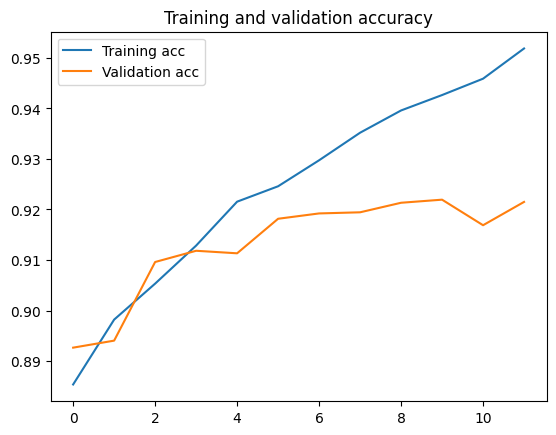

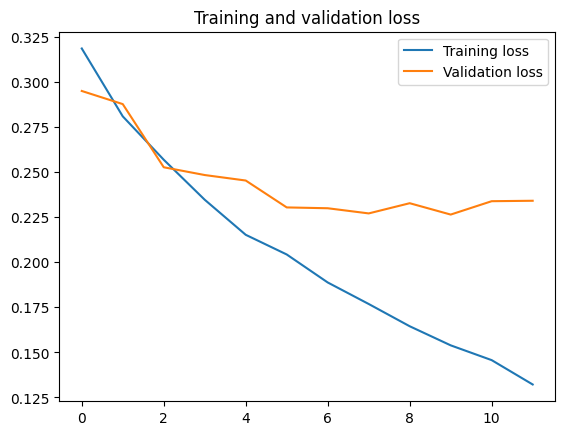

In [25]:
# 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
 # 모델 평가

test_scaled = X_test.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2471 - accuracy: 0.9165


[0.2471463680267334, 0.9164999723434448]

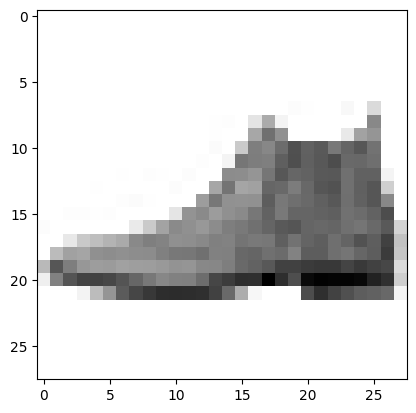

In [27]:
plt.imshow(test_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [28]:
test_scaled[0].shape


(28, 28, 1)

In [29]:
train_scaled.shape


(60000, 28, 28, 1)